### Modelling and Evaluation - Artificial Intelligence regression and classification performance metrics

After we have defined, optimised and validated the AI cores, the last step in the modelling and evaluation phase is evaluating the performance of the built models. As we have discussed there are numerous AI genres and methodologies but all, most of the time, will try to solve two very common problems. The first one is to predict a future value of a target variable that belongs in the continuous space Z calles regression and the later, a categorical future value amongst a collection of possible ones called classification. There are indeed, more complex problems than those two, however again, most of the times, can be seggregated into multiple sub-problems that fall into the previous two categories. Furthermore a significant part of these use cases fall under the supervised learning AI context.

Regardless of the category, we will usually be designing and training a few AI cores before we decide on the best one to push into production. We therefore need the quantitative means that will enable to decide which core is the best to use. The evaluation metrics available are different depending on the genre of the AI problem at hand and in this article we will be discussing available regression and classification AI evaluation metrics.  

### Defining Regression Metrics
Regression is the process of trying to build a model that can unravel the relation between the value of a variable called the dependent variable with one or more independent variables given their corresponding values in an effort to forecast the former one. There exist numerous AI cores that are able to solve regression problems ranging from the simpler linear, ridge or lasso regression to Random forests, Neural Networks and Deep Neural Networks.

Regardless of the core used, there are several regression evaluation metrics available in the bibliography and depending on the use case the most frequently used ones are:

- Mean Absolute Error
- Mean Absolute Percentage Error
- Mean Square Error
- Mean Log Square Error
- R Squared

### Evaluating regressions
Most of the metrics mentioned in this Blueprint are well implemented in several software packages. For the purposes of the Blueprint we will be using the builtin metrics module from scikit-learn. Let's start by importing all the available metrics in scikit-learn:

In [204]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, confusion_matrix, classification_report, auc
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Let's now start by generating a regression scenario using make_regression(). The function is can generate interesting use cases through its various parameters available. 

In [201]:
x, y = make_regression(n_samples=1000, n_features=5, n_informative = 3, n_targets=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

rgr = LinearRegression()
rgr.fit(x_train, y_train)
y_hat = rgr.predict(x_test)

### Mean Absolute Error
The MAE is a very simple metric that calculates the difference between the actual and predicted values, mathematicaly it is defined as:

MAE will report performance in the same unit as the dependent variable and it is resilient to outliers due to the nature of the calculation.


### Mean Absolute Percentage Error
MAPE is the ratio of the sum of differences between actual and predicted values to actual values averaged on the dataset points. Mathematicaly it can be written as:

MAPE has some significant drawbacks with a major one being that it cannot be used with actual zero values.

### Mean Square Error
MSE is again a simple metric and its difference with MAE is that it sqaures the residuals. Its advantage is that it is a diferentaible function and hence can also be used for optimisation purposes. MSE is not resilient to outliers because of the squaring process.

### Mean Log Square Error
MSLE is a measure of the ratio of the difference of the actual versus the predicted values. The introduction of the logarithm makes the metric somewhat agnostic to scale as it treats small differences in small values equally as large difference in large values. However the metric introduces a calculation asymetry by penalising underestimates more than overestimates. The equation expressing MSLE is:


### R-Squared
R-squared is one of the most used regression evaluation metrics as it reveals how much of hte variance of the dataset is explained from the model. R2 is also known as the coefficient of determination.R2 is also very easily explained as it is essentially a percentage. MAthematicaly it is expressed as:


Let's write a small function that will accept the y_actual and y_hat values and report back with all calculated metrics so that we can use with the two different models:

In [209]:
def regression_performance_report(y_actual, y_hat):
    mae = mean_absolute_error(y_actual, y_hat)
    mape = mean_absolute_percentage_error(y_actual, y_hat)
    mse = mean_squared_error(y_actual, y_hat)
    r2 = r2_score(y_actual, y_hat)
    
    print(f'Model Performance report mae:{mae}, mape:{mape}, mse:{mse}, msle:{msle}, r2:{r2}')

In [210]:
regression_performance_report(y_test, y_hat)

Model Performance report mae:0.09838053245808906, mape:0.0014697925076210762, mse:0.015072468686679222, msle:0.03973012298459379, r2:0.9999982932951016


In [211]:
rgr = Ridge()
rgr.fit(x_train, y_train)
y_hat = rgr.predict(x_test)

regression_performance_report(y_test, y_hat)

Model Performance report mae:0.09838053245808906, mape:0.0014697925076210762, mse:0.015072468686679222, msle:0.03973012298459379, r2:0.9999982932951016


### Defining Classification Metrics
Classification is the process of identifying and categorising items or concepts into predetermined categories. There are many AI cores that can solve classification tasks. Most classification processes fall into the supervised learning space, whether that might be binary classification or multi-class classification problems. Amongst others, classification  techniques that can be utilised include logistic regression, Naive Bayes, kernel-SVMs, classification forests and Artificial Neural Networks.

The most popular classification metrics that can be used to evaluate such AI cores are:
- Accuracy
- Confusion matrix
- AUC - ROC
- F1 score
- Precision - Recall curves


### Simulating classification  scenarios
We will be using the make_classification() function from sklearn to generate a hypothetical classification scenario. The function is quite powerful and can generate interesting use cases through parameterisation. We will generate a binary classification scenario of five existing features with only three of them having strong predictive value and no imbalancing.

In [184]:
x, y = make_classification(n_samples=1000, n_features=5, n_informative = 3, n_classes=2, weights=None)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

### Accuracy score and other statistical metrics
A very simple metric for classification performance evaluation, it is essentialy the fraction of correct predictions and it can be computed very easily using the accuracy_score() function. Let's use a Support Vector Classifier on the generated scenario:

In [185]:
print(f'Model accuracy:{accuracy_score(y_test, y_pred)}')

Model accuracy:0.892


A very convenient function that can give a lot of insight out-of-the-box is the classification_report which will provide us with some of the most important classification metrics:

In [186]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.90      0.90       130
     class 1       0.89      0.88      0.89       120

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



### Confusion matrix

The confusion matrix is a very important tool as it allows us to calculate several performance metrics of the model. The main components of the confusion matrix are:
- True Positives (TP): The records correctly classified as possitives
- True Negatives (TN): The records correctly classified as negatives
- False Positives (FP): The records falsely classified as possitives
- False Negatives (FN): The records falsely classified as negatives

A confusion matric is mostly used in supervised classification problems but it can also be used in unsupervised ones where it is called a matching matrix. Bellow we can see the structure of the confusion matrix:

Now let's calculate some of the most frequently used confusion matrix metrics:

- Sensitivity or Recall: TP/(TP + FN)
- Specificity: TN/(TN + FP)
- Precision: TP/(TP + FP)
- Negative Predictive Value: TN/(TN + FN)
- False Positive Rate: FP/(TN + FP)
- Prevalence: P/(P + N)
- Accuracy: (TP + TN)/(P + N)
- F1 Score: 2TP/(2TP + FP + FN)

Different applications will focus more on specific metricas rather than all of them depending on what is perceived as more critical by the bussiness. The confusion matrix can be easily calculated through sklearn.metrics. Furthermore there is a convenient function to use to plot the matrix ConfusionMatrixDisplay().



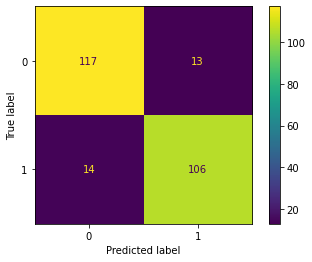

In [187]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### Area Under Curve - Receiver Operating Characteristic
Often times the final quantitative metrics that are calculated from the confusion matrix are not enough allow us to evaluate the model's performance. When we need to evaluate the model under different TP and FP threshold settings the Area Under Curve/ Receiver Operating Characteristic curve is the tool to use. The AUCROC is a probability plot and to form it we calculate:
- Sensitivity
- Specificity
- False Positive Rate (FPR): 1 - Specificity

Let us interpret the AUCROC plot, we will start from an ideally separable data space forming a binary classification problem. In such a case the models are able to perfectly separate the two classes and therefore the ROC curve has the form of the following graph with an AUC equal to 1.


In the case of a not clearly separable space, the models will exhibit some accuracy which after optimisations need to at least beat a random model:


The worst possible scenario is a non-separable data space where the models are performing as if a random decision was made:


Any AUC less than 0.5 usually denotes some kind of systemic issue in the design and implementation process of the model.


In [194]:
n_classes = 2
y_score = clf.fit(x_train, y_train).predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

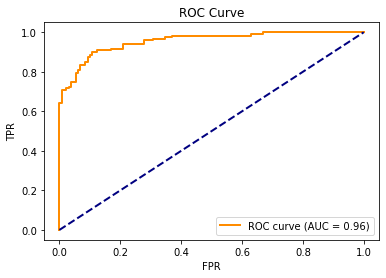

In [195]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (AUC = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Precision - Recall curves
A precision recall curve is a rather interesting plot, especially in the context of imbalanced learning. As the name implies it plots precision on the y axis against recall on the x axis. Ideally we would like an AI to have both very high recall and precision performance, however, when this is not the case and especially in heavily imbalanced datasets it is recommended to use precision-recall curves rather than ROC curves that will generaly mis-interpret results due to imbalancing. 

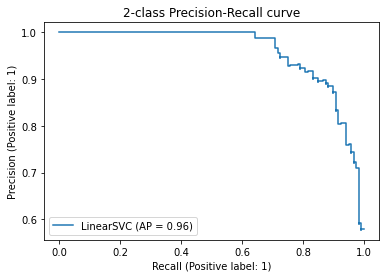

In [196]:
display = PrecisionRecallDisplay.from_estimator(
    clf, x_test, y_test, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

### Conclusions
In this blueprint we have explored numerous metrics to use when evaluating regression and classification Artificial Intelligence. The blueprint is by no means thorough it however touches upon the mostly used metrics that will cover most of the AI use cases, however many more exist that may be more applicable as we move towards more edge cases. 